# Trading Sentiment Analysis
Submitted by: Jay Patel

Date: 25-06-2025

### Phase 1: Data Loading and timestamp alignment

In [44]:
import pandas as pd
import numpy as np
import os 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns



In [45]:
fgIndex= pd.read_csv('fear_greed_index.csv')
histData = pd.read_csv('historical_data.csv')

In [46]:
fgIndex.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [47]:
fgIndex['value'].unique()

array([30, 15, 40, 24, 11,  8, 36, 44, 54, 31, 42, 35, 55, 71, 67, 74, 63,
       39, 33, 37, 41, 38, 47, 56, 59, 32, 29, 28, 18, 12, 16, 22, 17, 19,
       20, 21, 23, 26, 25, 64, 61, 52, 62, 53, 27, 34, 43, 46, 49, 48, 14,
       13, 51,  9, 10, 65, 69, 58, 50, 57, 60, 68, 66, 76, 75, 78, 77, 70,
       73, 80, 84, 83, 82, 81, 87, 95, 92, 79, 72, 45,  5, 90, 88, 86, 89,
       91, 94, 93,  7,  6])

In [48]:
fgIndex.classification.unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [49]:
histData.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [50]:
histData.Coin.unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL',
       'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK',
       'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP',
       'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19',
       '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45',
       '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6',
       '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32',
       '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74',
       'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR',
       'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL',
       'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI',
       'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX',
       'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON',
       'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL',
       'CO

In [51]:
fgIndex.info

<bound method DataFrame.info of        timestamp  value classification        date
0     1517463000     30           Fear  2018-02-01
1     1517549400     15   Extreme Fear  2018-02-02
2     1517635800     40           Fear  2018-02-03
3     1517722200     24   Extreme Fear  2018-02-04
4     1517808600     11   Extreme Fear  2018-02-05
...          ...    ...            ...         ...
2639  1745818200     54        Neutral  2025-04-28
2640  1745904600     60          Greed  2025-04-29
2641  1745991000     56          Greed  2025-04-30
2642  1746077400     53        Neutral  2025-05-01
2643  1746163800     67          Greed  2025-05-02

[2644 rows x 4 columns]>

In [52]:
histData.info

<bound method DataFrame.info of                                            Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010

In [118]:
print(histData.columns)
print(fgIndex.columns)


Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'trade_date', 'trade_value_per_token'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [54]:
histData['Timestamp'] = pd.to_datetime(histData['Timestamp'], unit='ms')
histData['trade_date'] = histData['Timestamp'].dt.date

##     Phase 2: Data Cleaning & Preparation


In [ ]:
histData.columns = (
    histData.columns
    .str.strip()                
    .str.lower()                
    .str.replace(r'\s+', '_', regex=True)  
    .str.replace(r'[^\w_]', '', regex=True)  
)

In [56]:
histData.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'trade_date'],
      dtype='object')

In [57]:
unique = (histData['side'].str.lower() != histData['direction'].str.lower()).sum()

print(unique)

174606


In [58]:
histData.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'trade_date'],
      dtype='object')

In [59]:
histData['trade_value_per_token'] = histData['size_usd'] / histData['size_tokens']

In [ ]:
# def sentiment_bcucket(val):
#     if val <=25:
#         return "Extreme Fear"
#     elif val <= 50:
#         return "Fear"
#     elif val<=75:
#         return "Greed"
#     else:
#         return "Extreme Greed"


In [62]:
histData.dtypes

account                          object
coin                             object
execution_price                 float64
size_tokens                     float64
size_usd                        float64
side                             object
timestamp_ist                    object
start_position                  float64
direction                        object
closed_pnl                      float64
transaction_hash                 object
order_id                          int64
crossed                            bool
fee                             float64
trade_id                        float64
timestamp                datetime64[ns]
trade_date                       object
trade_value_per_token           float64
dtype: object

In [64]:
histData.to_csv("clean_histData.csv", index=False)
fgIndex.to_csv("clean_fgIndex.csv", index=False)

In [ ]:
clean_hd = pd.read_csv('clean_histData.csv')
clean_fg = pd.read_csv('clean_fgIndex.csv')

In [66]:
clean_fg.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [67]:
clean_hd.timestamp_ist.head

<bound method NDFrame.head of 0         02-12-2024 22:50
1         02-12-2024 22:50
2         02-12-2024 22:50
3         02-12-2024 22:50
4         02-12-2024 22:50
                ...       
211219    25-04-2025 15:35
211220    25-04-2025 15:35
211221    25-04-2025 15:35
211222    25-04-2025 15:35
211223    25-04-2025 15:35
Name: timestamp_ist, Length: 211224, dtype: object>

In [68]:
clean_hd['timestamp_ist'] = clean_hd['timestamp_ist'].str.strip().str[:10]

In [126]:
clean_hd['timestamp_ist'] = pd.to_datetime(clean_hd['timestamp_ist'], format="%d-%m-%Y").dt.date
clean_fg['date'] = pd.to_datetime(clean_fg['date']).dt.date

In [127]:
clean_hd['timestamp_ist'].head

<bound method NDFrame.head of 0         2024-12-02
1         2024-12-02
2         2024-12-02
3         2024-12-02
4         2024-12-02
             ...    
211219    2025-04-25
211220    2025-04-25
211221    2025-04-25
211222    2025-04-25
211223    2025-04-25
Name: timestamp_ist, Length: 211224, dtype: object>

In [128]:
clean_fg['date'].head

<bound method NDFrame.head of 0       2018-02-01
1       2018-02-02
2       2018-02-03
3       2018-02-04
4       2018-02-05
           ...    
2639    2025-04-28
2640    2025-04-29
2641    2025-04-30
2642    2025-05-01
2643    2025-05-02
Name: date, Length: 2644, dtype: object>

In [129]:
clean_fg.dtypes

timestamp          int64
value              int64
classification    object
date              object
dtype: object

In [130]:
# stop here

##     Phase 3: Dataset Merge

In [131]:
merged_df = clean_hd.merge(
    clean_fg[['date', 'value', 'classification']],
    left_on='timestamp_ist',
    right_on='date',
    how='left'
)

In [132]:
merged_df.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'trade_date', 'trade_value_per_token', 'date', 'value',
       'classification'],
      dtype='object')

In [133]:
merged_df.describe

<bound method NDFrame.describe of                                            account      coin  execution_price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.10

In [134]:
merged_df.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'trade_date', 'trade_value_per_token', 'date', 'value',
       'classification'],
      dtype='object')

In [135]:
merged_df.drop(columns=['trade_date', 'date', 'timestamp'], inplace=True)

In [136]:
merged_df.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'trade_value_per_token', 'value', 'classification'],
      dtype='object')

In [174]:
# merged_df.to_csv("merged.csv", index=False)

##     Phase 4: Exploratory Data Analysis (EDA)


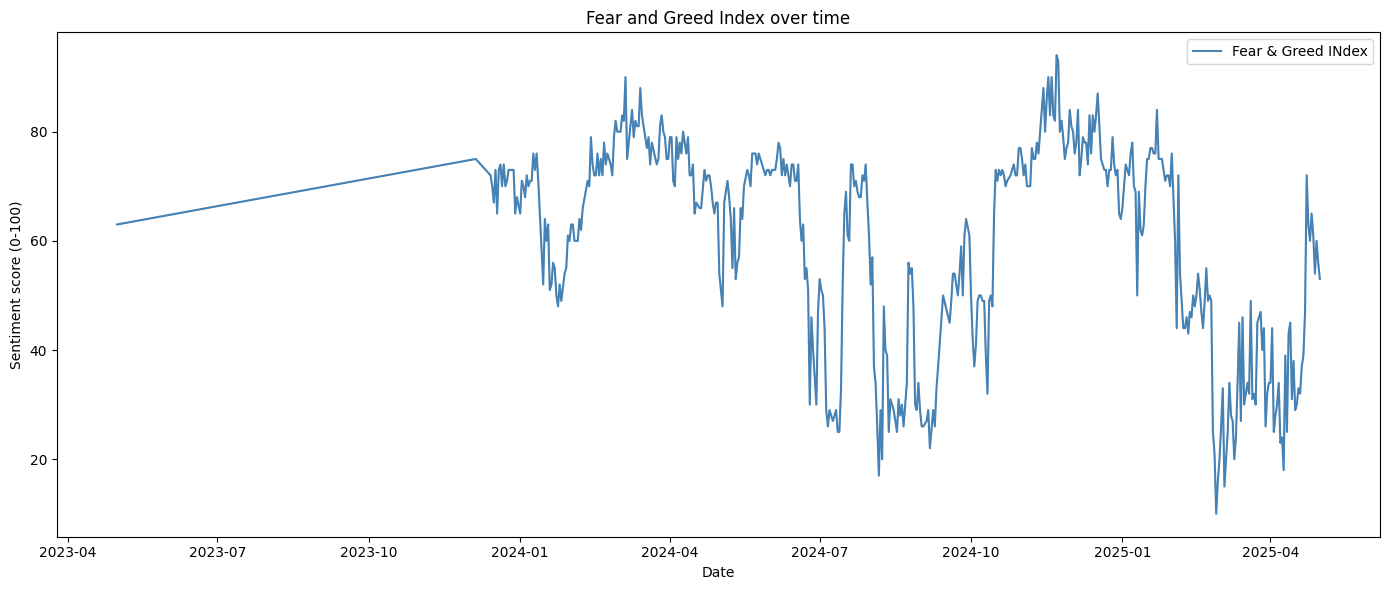

In [139]:
merged_df.sort_values('timestamp_ist', inplace=True)


plt.figure(figsize=(14,6))

sns.lineplot(data=merged_df,x='timestamp_ist', y='value', label= 'Fear & Greed INdex', color='steelblue')
plt.title("Fear and Greed Index over time")
plt.ylabel("Sentiment score (0-100)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

### grouped by date and sentiment

In [140]:
grouped = merged_df.groupby(['timestamp_ist', 'classification']).agg(
    trade_count=('trade_id', 'count'),
    total_volume_usd=('size_usd', 'sum'),
    unique_traders=('account', 'nunique')
).reset_index()


In [141]:
grouped.head

<bound method NDFrame.head of     timestamp_ist classification  trade_count  total_volume_usd  \
0      2023-05-01          Greed            3            477.00   
1      2023-12-05  Extreme Greed            9          50005.83   
2      2023-12-14          Greed           11         113203.35   
3      2023-12-15          Greed            2          10609.95   
4      2023-12-16          Greed            3          15348.77   
..            ...            ...          ...               ...   
474    2025-04-27          Greed          337         487537.69   
475    2025-04-28        Neutral         1379       26124921.49   
476    2025-04-29          Greed         2243       34089511.66   
477    2025-04-30          Greed         1113       12693878.85   
478    2025-05-01        Neutral         1230       10720240.52   

     unique_traders  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
..              ...  
474        

### TRADING VOLUME AND ACTIVITY BY SENTIMENT

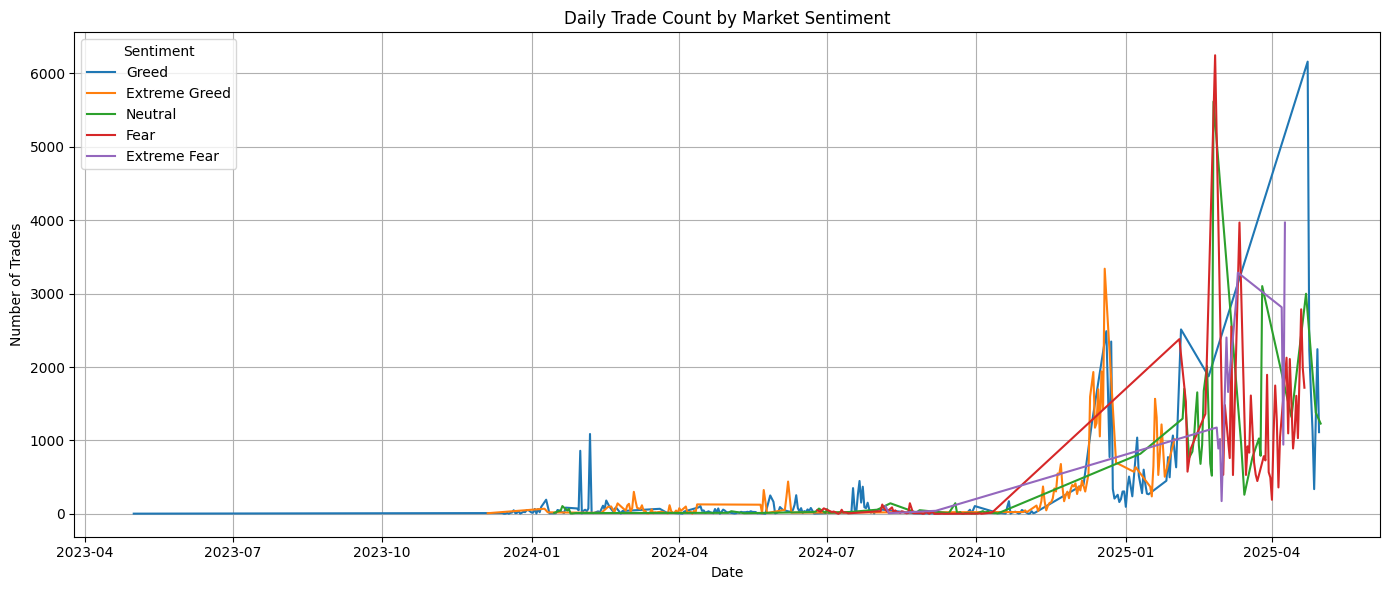

In [142]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=grouped, x='timestamp_ist', y='trade_count', hue='classification')
plt.title("Daily Trade Count by Market Sentiment")
plt.xlabel("Date")
plt.ylabel("Number of Trades")
plt.legend(title='Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()


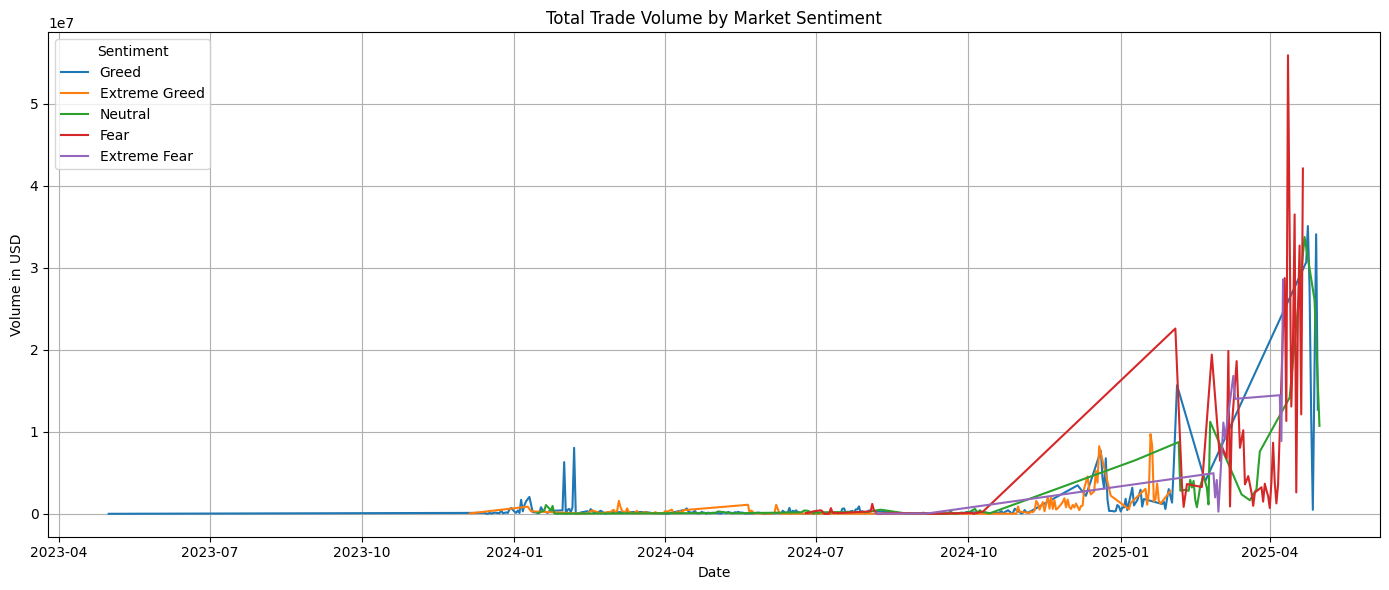

In [143]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=grouped, x='timestamp_ist', y='total_volume_usd', hue='classification')
plt.title("Total Trade Volume by Market Sentiment")
plt.xlabel("Date")
plt.ylabel("Volume in USD")
plt.legend(title='Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()


#### PnL ANALYSIS

In [145]:
pnl_by_sentiment = merged_df.groupby('classification').agg(
    avg_pnl=('closed_pnl', 'mean'),
    median_pnl=('closed_pnl', 'median'),
    total_pnl=('closed_pnl', 'sum'),
    win_rate=('closed_pnl', lambda x: (x > 0).mean() * 100),  # percent of positive PnL
    trade_count=('closed_pnl', 'count')
).reset_index()


C:\Users\jaysu\AppData\Local\Temp\ipykernel_14944\2538434638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_by_sentiment, x='classification', y='avg_pnl', palette='coolwarm')


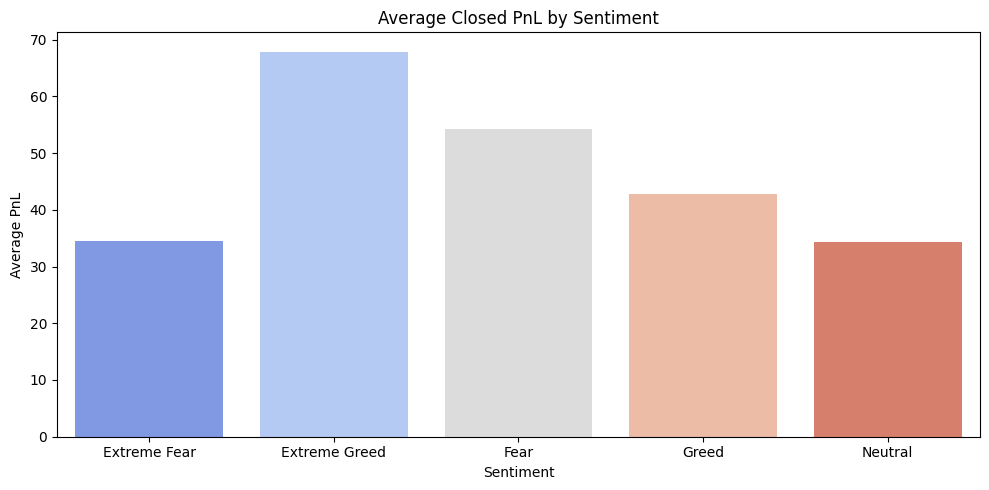

In [146]:
plt.figure(figsize=(10, 5))
sns.barplot(data=pnl_by_sentiment, x='classification', y='avg_pnl', palette='coolwarm')
plt.title("Average Closed PnL by Sentiment")
plt.ylabel("Average PnL")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()


C:\Users\jaysu\AppData\Local\Temp\ipykernel_14944\2028146845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_by_sentiment, x='classification', y='win_rate', palette='viridis')


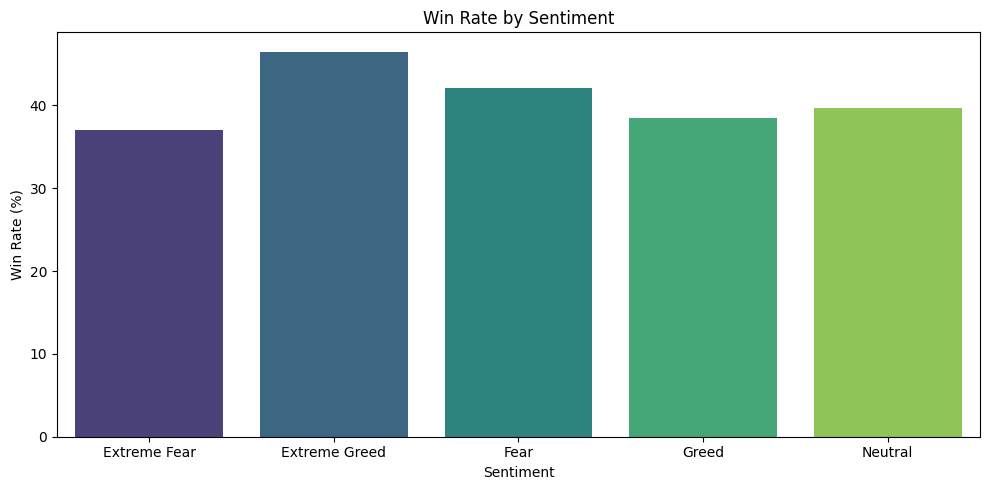

In [147]:
plt.figure(figsize=(10, 5))
sns.barplot(data=pnl_by_sentiment, x='classification', y='win_rate', palette='viridis')
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate (%)")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()


In [148]:
merged_df.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'trade_value_per_token', 'value', 'classification'],
      dtype='object')

## Phase 5: Pattern Detection & Insights

corr matrix: for value, pnl, size_usd

In [149]:
correlation_cols = merged_df[['value', 'closed_pnl', 'size_usd']]

correlation_cols.dropna(inplace=True)

C:\Users\jaysu\AppData\Local\Temp\ipykernel_14944\1750053901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_cols.dropna(inplace=True)


In [150]:
corr_matrix = correlation_cols.corr()

In [151]:
print(corr_matrix)

               value  closed_pnl  size_usd
value       1.000000    0.008121 -0.029843
closed_pnl  0.008121    1.000000  0.123645
size_usd   -0.029843    0.123645  1.000000


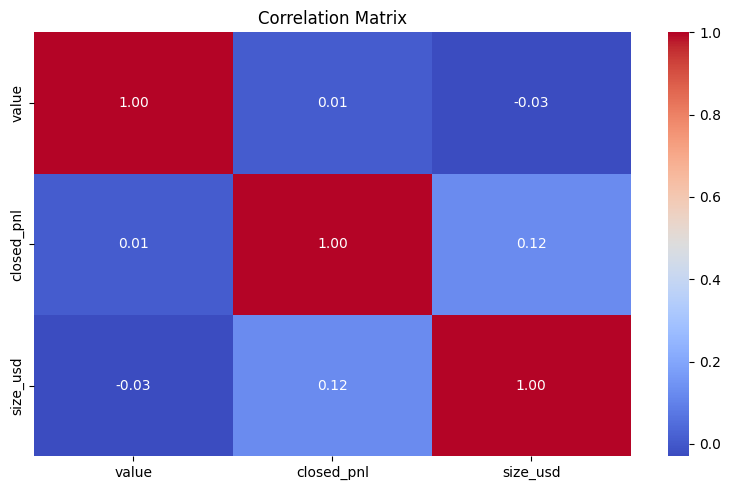

In [152]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


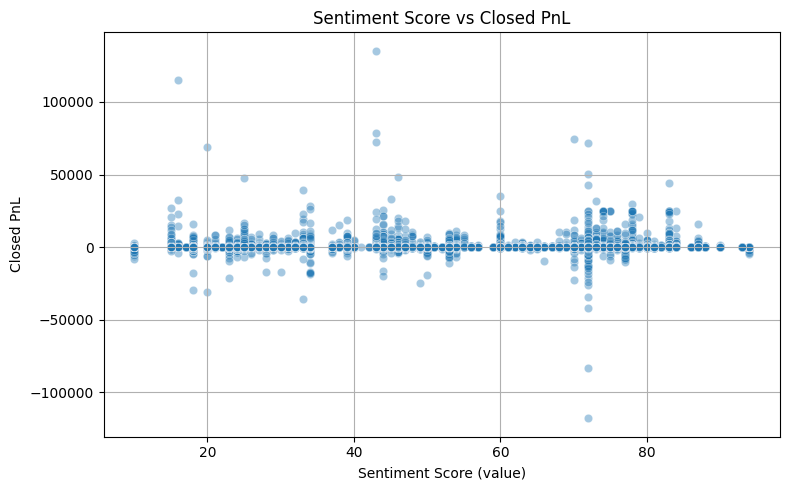

In [153]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='value', y='closed_pnl', alpha=0.4)
plt.title("Sentiment Score vs Closed PnL")
plt.xlabel("Sentiment Score (value)")
plt.ylabel("Closed PnL")
plt.grid(True)
plt.tight_layout()
plt.show()


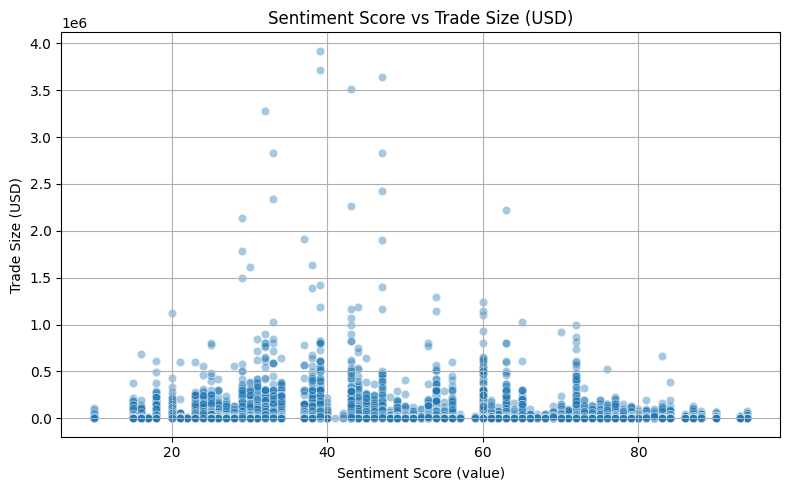

In [154]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='value', y='size_usd', alpha=0.4)
plt.title("Sentiment Score vs Trade Size (USD)")
plt.xlabel("Sentiment Score (value)")
plt.ylabel("Trade Size (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


traders behavioural insights

In [156]:
trader_sentiment_pnl = merged_df.groupby(['account', 'classification']).agg(
    avg_pnl=('closed_pnl', 'mean'),
    median_pnl=('closed_pnl', 'median'),
    trade_count=('closed_pnl', 'count'),
    win_rate=('closed_pnl', lambda x: (x > 0).mean() * 100)
).reset_index()


In [157]:
# Keep only 'Fear' and 'Greed' for simplicity
subset = trader_sentiment_pnl[trader_sentiment_pnl['classification'].isin(['Fear', 'Greed'])]

# Pivot to compare Fear vs Greed
pnl_pivot = subset.pivot(index='account', columns='classification', values='avg_pnl').fillna(0)

# Rename for clarity
pnl_pivot.columns = ['avg_pnl_fear', 'avg_pnl_greed']
pnl_pivot = pnl_pivot.reset_index()


In [158]:
# Contrarian traders: avg_pnl_fear > avg_pnl_greed
contrarians = pnl_pivot[pnl_pivot['avg_pnl_fear'] > pnl_pivot['avg_pnl_greed']].sort_values(by='avg_pnl_fear', ascending=False)


In [159]:
# Define consistent winners: avg_pnl > 0 in both Fear & Greed
consistent_winners = pnl_pivot[
    (pnl_pivot['avg_pnl_fear'] > 0) & (pnl_pivot['avg_pnl_greed'] > 0)
].sort_values(by=['avg_pnl_fear', 'avg_pnl_greed'], ascending=False)


In [161]:
print(pnl_pivot.head)

<bound method NDFrame.head of                                        account  avg_pnl_fear  avg_pnl_greed
0   0x083384f897ee0f19899168e3b1bec365f52a9012    626.194346     482.089321
1   0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd     -0.632623      10.211823
2   0x271b280974205ca63b716753467d5a371de622ab     16.125220    -185.221864
3   0x28736f43f1e871e6aa8b1148d38d4994275d72c4      9.594371      10.502556
4   0x2c229d22b100a7beb69122eed721cee9b24011dd     10.444070      79.350486
5   0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891     -1.824449     -34.627353
6   0x39cef799f8b69da1995852eea189df24eb5cae3c     37.175405     168.123179
7   0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6     53.880498     163.069861
8   0x420ab45e0bd8863569a5efbb9c05d91f40624641   1016.819167     177.690441
9   0x430f09841d65beb3f27765503d0f850b8bce7713     23.692203     294.922917
10  0x47add9a56df66b524d5e2c1993a43cde53b6ed85     10.821953      10.761178
11  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    212.5943

C:\Users\jaysu\AppData\Local\Temp\ipykernel_14944\2718785105.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jaysu\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


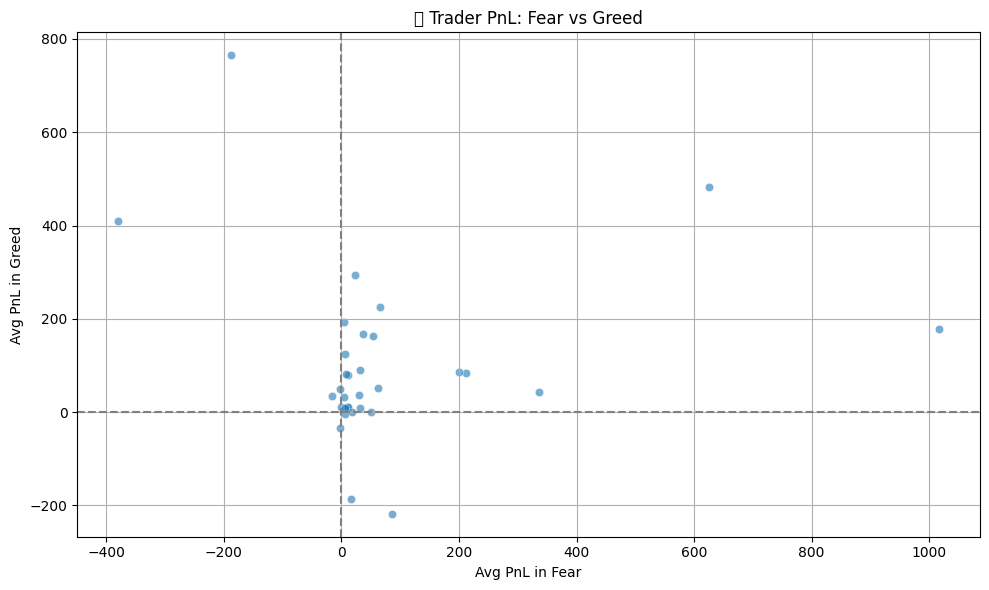

In [162]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pnl_pivot, x='avg_pnl_fear', y='avg_pnl_greed', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("📊 Trader PnL: Fear vs Greed")
plt.xlabel("Avg PnL in Fear")
plt.ylabel("Avg PnL in Greed")
plt.grid(True)
plt.tight_layout()
plt.show()


In [163]:
fear_traders = merged_df[merged_df['classification'] == 'Fear']['account'].nunique()
greed_traders = merged_df[merged_df['classification'] == 'Greed']['account'].nunique()
egreed_traders = merged_df[merged_df['classification'] == 'Extreme Greed']['account'].nunique()
efear_traders = merged_df[merged_df['classification'] == 'Extreme Fear']['account'].nunique()
ney_traders = merged_df[merged_df['classification'] == 'Neutral']['account'].nunique()

In [164]:
print(fear_traders)
print(greed_traders)
print(egreed_traders)
print(efear_traders)
print(ney_traders)

32
31
30
32
31


Sentiment Value Over Time

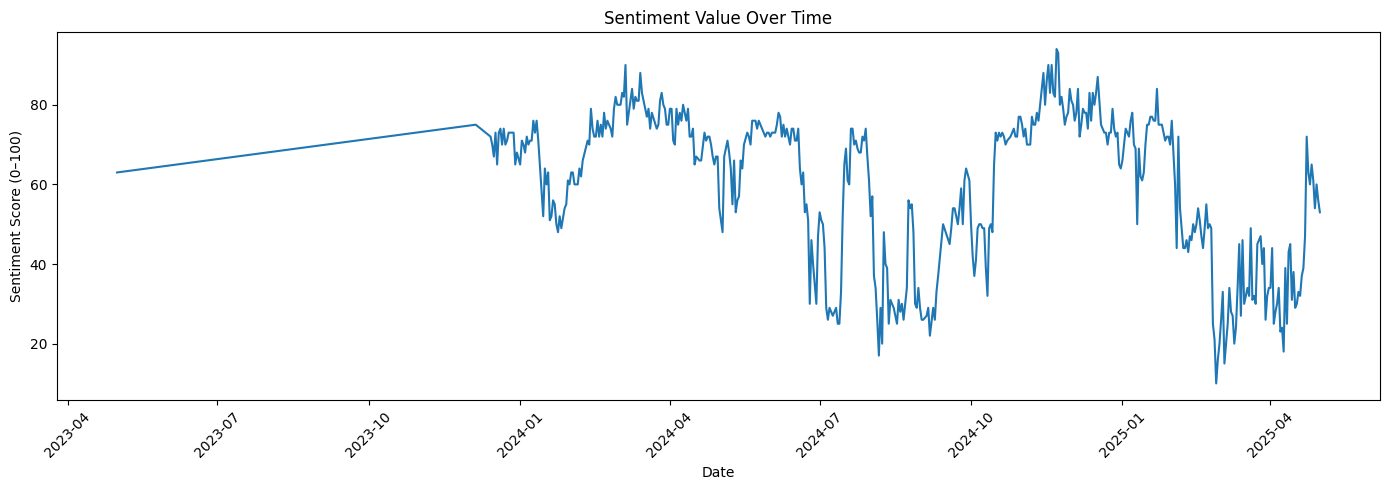

In [165]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=merged_df.drop_duplicates('timestamp_ist'), x='timestamp_ist', y='value')
plt.title("Sentiment Value Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (0–100)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\jaysu\AppData\Local\Temp\ipykernel_14944\533627119.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pnl_by_sentiment, x='classification', y='closed_pnl', palette='coolwarm')


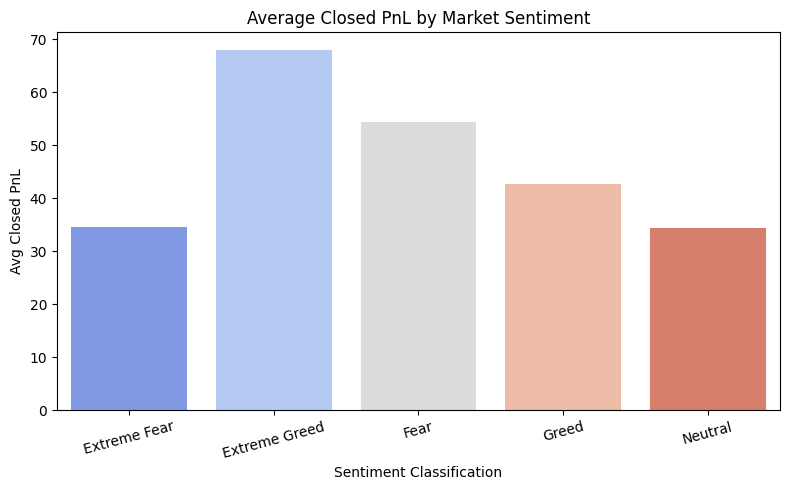

  classification  closed_pnl
0   Extreme Fear   34.537862
1  Extreme Greed   67.892861
2           Fear   54.290400
3          Greed   42.743559
4        Neutral   34.307718


In [166]:
avg_pnl_by_sentiment = merged_df.groupby('classification')['closed_pnl'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_pnl_by_sentiment, x='classification', y='closed_pnl', palette='coolwarm')
plt.title("Average Closed PnL by Market Sentiment")
plt.ylabel("Avg Closed PnL")
plt.xlabel("Sentiment Classification")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
print(avg_pnl_by_sentiment)

C:\Users\jaysu\AppData\Local\Temp\ipykernel_14944\1615757108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='size_usd', palette='pastel')


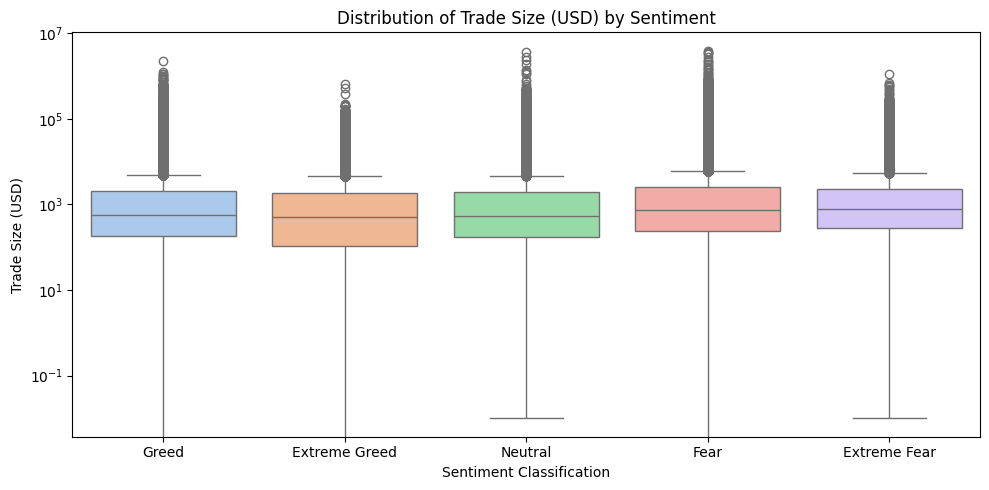

In [167]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_df, x='classification', y='size_usd', palette='pastel')
plt.title("Distribution of Trade Size (USD) by Sentiment")
plt.ylabel("Trade Size (USD)")
plt.xlabel("Sentiment Classification")
plt.yscale('log')  # Use log scale if there are huge outliers
plt.tight_layout()
plt.show()


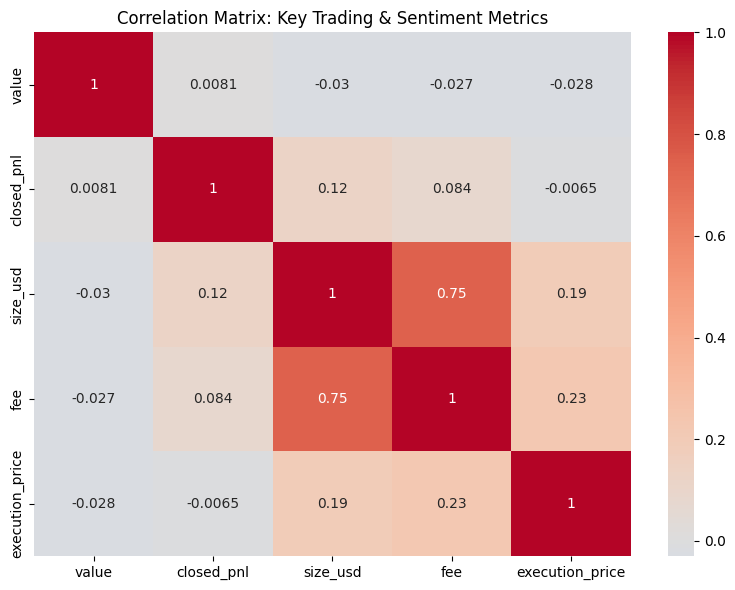

                    value  closed_pnl  size_usd       fee  execution_price
value            1.000000    0.008121 -0.029843 -0.026877        -0.027558
closed_pnl       0.008121    1.000000  0.123589  0.084020        -0.006505
size_usd        -0.029843    0.123589  1.000000  0.745939         0.189855
fee             -0.026877    0.084020  0.745939  1.000000         0.225265
execution_price -0.027558   -0.006505  0.189855  0.225265         1.000000


In [168]:
# Select numeric cols of interest
corr_cols = ['value', 'closed_pnl', 'size_usd', 'fee', 'execution_price']
corr_matrix = merged_df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix: Key Trading & Sentiment Metrics")
plt.tight_layout()
plt.show()

print(corr_matrix)


### Table 1: Sentiment → Avg/Total PnL, Win Rate, Avg Leverage

In [169]:
# Ensure leverage exists; fill with 0 or NaN if missing
if 'leverage' not in merged_df.columns:
    merged_df['leverage'] = np.nan  # or use 0 if more appropriate

summary_table_1 = merged_df.groupby('classification').agg(
    avg_pnl=('closed_pnl', 'mean'),
    total_pnl=('closed_pnl', 'sum'),
    win_rate=('closed_pnl', lambda x: (x > 0).mean() * 100),
    avg_leverage=('leverage', 'mean')
).reset_index()

summary_table_1 = summary_table_1.round(2)
summary_table_1


,classification,avg_pnl,total_pnl,win_rate,avg_leverage
0,Extreme Fear,34.54,739110.25,37.06,NaN
1,Extreme Greed,67.89,2715171.31,46.49,NaN
2,Fear,54.29,3357155.44,42.08,NaN
3,Greed,42.74,2150129.27,38.48,NaN
4,Neutral,34.31,1292920.68,39.70,NaN


### Table 2: Top Traders in Fear vs Greed

In [ ]:
# Group by sentiment and account
top_traders = merged_df.groupby(['classification', 'account'])['closed_pnl'].sum().reset_index()

# top 5 for Fear & Greed
top_fear = top_traders[top_traders['classification'].str.contains('Fear')].nlargest(5, 'closed_pnl')
top_greed = top_traders[top_traders['classification'].str.contains('Greed')].nlargest(5, 'closed_pnl')


top_traders_table = pd.concat([top_fear.assign(context='Fear'), top_greed.assign(context='Greed')])
top_traders_table = top_traders_table[['context', 'account', 'closed_pnl']].round(2)
top_traders_table


,context,account,closed_pnl
62,Fear,0x083384f897ee0f19899168e3b1bec365f52a9012,1113373.55
91,Fear,0xbaaaf6571ab7d571043ff1e313a9609a10637864,620872.38
75,Fear,0x513b8629fe877bb581bf244e326a047b249c4ff1,367166.22
73,Fear,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,296781.72
29,Fear,0xbaaaf6571ab7d571043ff1e313a9609a10637864,261917.98
59,Greed,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1105304.86
121,Greed,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,534058.24
61,Greed,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,478811.47
109,Greed,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,453595.32
94,Greed,0x083384f897ee0f19899168e3b1bec365f52a9012,276719.27


In [172]:
# Top 5 in Fear
top_fear = pnl_pivot.sort_values(by='avg_pnl_fear', ascending=False).head(5)

# Top 5 in Greed
top_greed = pnl_pivot.sort_values(by='avg_pnl_greed', ascending=False).head(5)

print("Top traders duting Fear:\n", top_fear)
print("\nTop traders during Greed:\n", top_greed)


Top traders duting Fear:
                                        account  avg_pnl_fear  avg_pnl_greed
8   0x420ab45e0bd8863569a5efbb9c05d91f40624641   1016.819167     177.690441
0   0x083384f897ee0f19899168e3b1bec365f52a9012    626.194346     482.089321
16  0x72c6a4624e1dffa724e6d00d64ceae698af892a0    335.300103      43.192043
11  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    212.594357      84.927562
30  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3    200.506120      86.452011

Top traders during Greed:
                                        account  avg_pnl_fear  avg_pnl_greed
15  0x72743ae2822edd658c0c50608fd7c5c501b2afbd   -187.201776     764.916220
0   0x083384f897ee0f19899168e3b1bec365f52a9012    626.194346     482.089321
24  0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0   -379.998039     408.979729
9   0x430f09841d65beb3f27765503d0f850b8bce7713     23.692203     294.922917
25  0xae5eacaf9c6b9111fd53034a602c192a04e082ed     66.092200     224.519734


### Table 3: Risk Behavior Breakdown (Avg Leverage & Size USD by Sentiment)

In [111]:
risk_table = merged_df.groupby('classification').agg(
    avg_trade_size_usd=('size_usd', 'mean'),
    median_trade_size_usd=('size_usd', 'median'),
    avg_leverage=('leverage', 'mean')
).reset_index()

risk_table = risk_table.round(2)
risk_table


,classification,avg_trade_size_usd,median_trade_size_usd,avg_leverage
0,Extreme Fear,5349.73,766.15,NaN
1,Extreme Greed,3112.25,500.05,NaN
2,Fear,7816.11,735.96,NaN
3,Greed,5736.88,555.00,NaN
4,Neutral,4782.73,547.66,NaN


## Phase 6: Visualization & Summary Reporting

# Performance & Profitability Patterns

### ✅ Greed Pays Slightly More – But Not Always
- **Average PnL** is highest in **Extreme Greed ($67.89)**.
- **Fear-based trades ($54.29)** also show strong profitability.
- **Extreme Fear ($34.54)** and **Neutral ($34.31)** yield the **lowest average PnL**.

### 🏆 Top Traders Excel in Fear
- The **top performer during Fear** (`0x0833...9012`) also ranks among top traders in Greed — suggesting **adaptable strategies** outperform sentiment-following.

### 📈 Contrarian Success Exists
- Traders like `0x420a...641` and `0x72c6...2a0` achieved **very high avg PnL during Fear**, proving **some thrive during pessimistic market phases**.

---

# 📉 Win Rate & Trade Outcomes

### ❗ Win Rates Do Not Strongly Correlate with Sentiment
- Highest win rate is just **~46% in Extreme Greed**.
- **PnL seems to depend more on position sizing or outlier gains** than consistently high win rates.

### 🔗 Closed PnL Has Low Correlation with Sentiment Score
- Correlation between **sentiment score and PnL is ~0.008**.
- **Sentiment score alone may not be a strong predictive indicator** of profitability.

---

# 📈 Trader Behavior & Risk Appetite

### 💰 Highest Risk Appetite in Fear Sentiment
- **Average trade size is highest during Fear** (~$7.8k).
- Traders may **deploy more capital during uncertainty**, anticipating market rebounds.

### 💸 Fees & Trade Size Are Strongly Correlated
- Correlation between **trade size and fees is ~0.74**.
- Suggests **larger traders generate proportionally more revenue** for platforms.

---



---

### 🧩 Final Summary of Insights

- 📈 **Extreme Greed yields the highest average PnL**, but trades during **Fear also generate strong returns**, proving both ends of sentiment can be profitable.
- 🧠 **Top-performing traders succeed across sentiment phases**, indicating that **adaptable strategies** outperform those strictly following sentiment trends.
- 🔁 **Contrarian strategies thrive in Fear** — several traders posted outstanding gains during pessimistic market conditions.
- ⚠️ **Win rate does not strongly correlate with sentiment**; the best win rate (~46%) is still modest, showing **PnL is driven by trade sizing or outliers**, not just consistency.
- 📊 **Sentiment score has near-zero correlation with actual PnL**, suggesting it's **not a reliable standalone trading signal**.
- 💰 **Traders deploy larger capital during Fear**, reflecting **greater risk appetite in uncertain times**, likely in anticipation of reversals.
- 💸 **Fees scale with trade size** (correlation ~0.74), showing that **large-volume traders contribute significantly to platform revenue**.

---
